In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
import os
from os import path
import h5py
import sys
import Initialize_Paths as Paths

# Import Reading Functions
sys.path.insert(0, Paths.Surqct_path  + '/surqct/scripts/Paper_figures/')
from Reading import read_diatdata, read_HDF5, read_pops

In [2]:
pd.set_option('display.max_columns', None)  
sns.set_style('ticks')
plt.rc('text', usetex=True)
# plt.rc('text.latex', preamble=r'\usepackage{pifont} \usepackage{tikz} \usepackage[utf8]{inputenc}')
# plt.rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
plt.rc('font', family='Times')
sns.set_context("notebook", font_scale=1.5)
plt.rcParams['xtick.labelsize'] = 40
plt.rcParams['ytick.labelsize'] = 40
plt.rcParams['axes.labelsize'] = 40
plt.rcParams['axes.titlesize'] = 40
plt.rcParams['legend.fontsize'] = 40

In [3]:
SystName    = 'N3_NASA'
Dimension   = 'nondim_N3'
InelRunNb   = 8
ExchRunNb   = 2
DissRunNb   = 55
ReactionFlgQCT    = '0_1_1_0'
ReactionFlgSurQCT = '0_1_1_0'
TempVec = [5000,10000]
PopPlotTime = [1e-6]

SaveData = True
SaveFigures = False

In [4]:
import Initialize_System
Initialize = getattr(Initialize_System,'Initialize_'+SystName)
System = Initialize()

In [5]:
SurQCT_ME_path = Paths.Workspace_path + 'Air_Database/Run_0D_surQCT/' + Dimension + '_RunI'+str(InelRunNb)+'_E'+str(ExchRunNb)+'_D'+str(DissRunNb)+'/'

Data_ME_path   = Paths.Surqct_path + '0D/Data/' + System.Name + '/' + Dimension + '_RunI'+str(InelRunNb)+'_E'+str(ExchRunNb)+'_D'+str(DissRunNb)+'/'
Figure_ME_path = Paths.Surqct_path + '0D/Figures/' + System.Name + '/' + Dimension + '_RunI'+str(InelRunNb)+'_E'+str(ExchRunNb)+'_D'+str(DissRunNb)+'/'

try:
    os.makedirs(Data_ME_path)
except OSError as e:
    pass

try:
    os.makedirs(Figure_ME_path)
except OSError as e:
    pass

print('SurQCT Master Equation Path :', SurQCT_ME_path)
print('Data Master Equation Path   :', Data_ME_path)
print('Figures Master Equation Path:', Figure_ME_path)

SurQCT Master Equation Path : /home/venturi/WORKSPACE/Air_Database/Run_0D_surQCT/nondim_N3_RunI8_E2_D55/
Data Master Equation Path   : /home/venturi/WORKSPACE/SurQCT/0D/Data/N3_NASA/nondim_N3_RunI8_E2_D55/
Figures Master Equation Path: /home/venturi/WORKSPACE/SurQCT/0D/Figures/N3_NASA/nondim_N3_RunI8_E2_D55/


In [6]:
# Read Diatomic Potentials
DiatData   = []

for iMol in range(System.NMolecules):
    DiatDataTemp = read_diatdata(System.PathToDiatFile[iMol], System.Molecule[iMol].Name, TempVec)
    DiatData.append(DiatDataTemp)
    System.Molecule[iMol].NLevels = np.size(DiatData[iMol]['EInt'].to_numpy())

Temp = TempVec[0]
# Read Rates
PathToHDF5File = System.PathToHDF5Fld+System.Name+'.hdf5'
System = read_HDF5(System, PathToHDF5File, Temp, Temp)


[HCN]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE/CoarseAIR/coarseair/dtb/Molecules/N2/LeRoy/MyLeroy_FromRobyn.inp
[HCN]:   Reading Rates Data from: /home/venturi/WORKSPACE/Air_Database/HDF5_Database_semiClassicalApprox/N3_NASA.hdf5


In [7]:
SurQCT=[]
PopSurQCT = []

for iTemp in range(len(TempVec)):

    Temp = TempVec[iTemp]

    # SurQCT
    FileName=SurQCT_ME_path+'output_'+System.Name+'_T'+str(Temp)+'K_'+ReactionFlgSurQCT+'/box.dat'
    SurQCTTemp=pd.read_csv(FileName,delimiter='  ')
    SurQCTTemp.columns = System.Box_Header
    SurQCT.append(SurQCTTemp)
    SurQCT[iTemp].NSteps = np.size(SurQCT[iTemp]['time'].to_numpy()) 
    
    PopFilePath=SurQCT_ME_path+'output_'+System.Name+'_T'+str(Temp)+'K_'+ReactionFlgSurQCT
    PopTempSurQCT=read_pops(PopFilePath,System,DiatData,SurQCT[iTemp].time)
    PopSurQCT.append(PopTempSurQCT)

<ipython-input-7-dc6656f3cdc7>:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  SurQCTTemp=pd.read_csv(FileName,delimiter='  ')


[Master Equation]:   Reading Population Data from: /home/venturi/WORKSPACE/Air_Database/Run_0D_surQCT/nondim_N3_RunI8_E2_D55/output_N3_NASA_T5000K_0_1_1_0


/home/venturi/WORKSPACE/SurQCT//surqct/scripts/Paper_figures/Reading.py:102: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Pop=pd.read_csv(FileName,sep="   ",skiprows=2,header=None,index_col=False,comment='&')
/home/venturi/WORKSPACE/SurQCT//surqct/scripts/Paper_figures/Reading.py:105: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  Pop.Pop_g = np.reshape(Pop.PopTemp.to_numpy(),(np.size(time)+1,System.Molecule[0].NLevels))
/home/venturi/WORKSPACE/SurQCT//surqct/scripts/Paper_figures/Reading.py:106: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  Pop.Pop = DiatData[

[Master Equation]:   Reading Population Data from: /home/venturi/WORKSPACE/Air_Database/Run_0D_surQCT/nondim_N3_RunI8_E2_D55/output_N3_NASA_T10000K_0_1_1_0


In [8]:
# from Compute import compute_energy
from scipy.interpolate import CubicSpline
from scipy.optimize import root_scalar, fsolve

def compute_energy(System,Pop,DiatData,Run):
    # Energy computation
    eRot=np.zeros(Run.NSteps)
    eVib=np.zeros(Run.NSteps)
    NSteps = Run.NSteps
    time = Run['time']
    
    #    for iMol in range(len(System.Molecule)):
    iMol = 0
    for iStep in range(0,Run.NSteps):
        Ni = Pop[iStep,:]
        NiTot = np.sum(Ni)   
        eRot[iStep] = sum( DiatData[iMol]['ERot']*Ni ) / NiTot
        eVib[iStep] = sum( DiatData[iMol]['EVibv0Ref']*Ni ) / NiTot
    
    # Compute TauRot
    eRotLim = (eRot[NSteps-1] - eRot[1]) * 0.632 + eRot[1]
    TempCoeff = 1
    if(eRot[NSteps-1] < eRot[1]):
        TempCoeff = -1
    iRot=2;
    while (TempCoeff*eRot[iRot] < TempCoeff*eRotLim and (iRot<NSteps-1)):
        iRot = iRot+1
    tauRot = (time[iRot] + time[iRot-1])/2.0
    xData = time[2:NSteps-2]
    yData = eRot[2:NSteps-2] - eRotLim
    Taus = CubicSpline(xData, yData)
    tauRot_calculated = fsolve(Taus,[tauRot]) 
    
    # Compute TauVib
    eVibLim = (eVib[NSteps-1] - eVib[1]) * 0.632 + eVib[1];
    TempCoeff = 1;
    if(eVib[NSteps-1] < eVib[1]):
        TempCoeff = -1;
    iVib=2;
    while (TempCoeff*eVib[iVib] < TempCoeff*eVibLim and (iVib<NSteps-1)):
        iVib = iVib+1;

    tauVib = (time[iVib] + time[iVib-1])/2.0
    xData = time[2:NSteps-2]
    yData = eVib[2:NSteps-2] - eVibLim
    Taus = CubicSpline(xData, yData)
    tauVib_calculated = fsolve(Taus,[tauVib]) 
    
    return eRot, eVib, tauRot_calculated, tauVib_calculated

Tau = pd.DataFrame({'Temp':[5000]})

for iTemp in range(len(TempVec)):

    Temp = TempVec[iTemp]
    SurQCT[iTemp].eRot, SurQCT[iTemp].eVib, SurQCT[iTemp].tauRot, SurQCT[iTemp].tauVib = compute_energy(System, PopSurQCT[iTemp].Pop, DiatData, SurQCT[iTemp])
    
    AtomicMoleFraction = SurQCT[iTemp][System.Atom[0].Name]
    Pressure = AtomicMoleFraction.iloc[-1] * SurQCT[iTemp]['Pressure'].iloc[-1]/101325.0
    Tau['Temp'] = Temp
    Tau['Pressure'] = Pressure
    Tau['TauRot'] = SurQCT[iTemp].tauRot[0] * Pressure
    Tau['TauVib'] = SurQCT[iTemp].tauVib[0] * Pressure

    if(SaveData):
        file = Data_ME_path + 'DNN_Taus_'+System.Molecule[0].Name+'_'+ReactionFlgSurQCT+'.csv'
        Tau.to_csv(file,mode="a",index=False,header=False)
    

<ipython-input-8-16b7438eb540>:56: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  SurQCT[iTemp].eRot, SurQCT[iTemp].eVib, SurQCT[iTemp].tauRot, SurQCT[iTemp].tauVib = compute_energy(System, PopSurQCT[iTemp].Pop, DiatData, SurQCT[iTemp])


In [21]:
def Plot_MoleFraction(System,SurQCT,TempVec,MoleFractionXLim):                                                                           
                                                                                                                                             
    fig,ax = plt.subplots(1,1,figsize=(10,10))                                                                                               
    MoleculeName = System.Molecule[0].Name                                                                                                   
                                                                                                                                           
    plt.plot(SurQCT.time, SurQCT[MoleculeName], '-r', label='SurQCT',linewidth=5)                                                            
                                                                                                                                             
    plt.legend(frameon=False)                                                                                                                
    plt.xscale('linear')                                                                                                                     
    plt.xlabel('t [s]')                                                                                                                      
    plt.ylabel('X')                                                                                                                          
    plt.xlim(MoleFractionXLim)                                                                                                               
    ax.xaxis.set_minor_locator(AutoMinorLocator())                                                                                           
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')                                                                                 
    fig.tight_layout(pad=0.5)                                                                                                                
                                                                                                                                             
    return fig      

def Plot_Energies(System,SurQCT,TempVec,EnergyXLim):                                                                                     
                                                                                                                                             
    iTemp = 0                                                                                                                                
    fig,ax = plt.subplots(1,1,figsize=(10,10))                                                                                               
                                                                                                                                             
    for iTemp in range(len(TempVec)):                                                                                                        
                                                                                                                                             
        Temp = TempVec[iTemp]                                                                                                                
                                                                                                                                             
        plt.plot(SurQCT[iTemp].time, SurQCT[iTemp].eRot, color='red', linestyle='dashed', linewidth=5,label='ERot')                                       
        plt.plot(SurQCT[iTemp].time, SurQCT[iTemp].eVib, color='red',linestyle='-', linewidth=5,label='EVib')                                             
                                                                                                                                             
        plt.legend(frameon=False)                                                                                                            
        plt.xscale('log')                                                                                                                    
        plt.xlabel('t [s]')                                                                                                                  
        plt.ylabel('E [eV]')                                                                                                                 
        plt.xlim(EnergyXLim)                                                                                                                 
        ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')                                                                             
        fig.tight_layout(pad=0.5)                                                                                                            
                                                                                                                                             
    return fig 

def Plot_KDth_qss(System,Data_ME_path,KDXLim):                                                                                                                                                                                                                                                                                                                                                                                                                        
                                                                                                                                                                                                                                                             
    SurQCT_KDFile = Data_ME_path+'/DNN_KGlobal_'+ReactionFlgSurQCT+'_'+System.Molecule[0].Name+'.csv'                                                                                                                                                                 
    SurQCT_KD = pd.read_csv(SurQCT_KDFile,header=None,skiprows=1)                                                                                                                                                                                               
    SurQCT_KD.columns = ['Temp','KdissTh','KexchTh','KdissQSS','KexchQSS']                                                                                                                                                                                   
           
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    plt.plot(10000/SurQCT_KD.Temp, SurQCT_KD.KdissTh, '--rs',markersize=7,linewidth=3)   
    plt.plot(10000/SurQCT_KD.Temp, SurQCT_KD.KdissQSS, ':ro',markersize=7,linewidth=3)
    
    plt.legend(frameon=False)                                                                                                                                                                                                                                
    plt.yscale('log')                                                                                                                                                                                                                                        
    plt.xlabel('10000/T [K$^{-1}$]')                                                                                                                                                                                                                                    
    plt.ylabel('$k^D$ [cm$^3$/s]')                                                                                                                                                                                                                           
    plt.xlim(KDXLim)                                                                                                                                                                                                                                          
    plt.ylim([1e-15,1e-9])    
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    fig.tight_layout(pad=1.0) 
                                                                                                                                                                                                                                                             
    return fig                                                                                                                                                                                                                                               

def Plot_taus(System,Data_ME_path):                           
    
    SurQCT_tausFile = Data_ME_path+'/DNN_Taus_'+System.Molecule[0].Name+'_'+ReactionFlgSurQCT+'.csv'                                                                                                                                                                 
    SurQCT_taus = pd.read_csv(SurQCT_tausFile,header=None,skiprows=1)                                                                                                                                                                                           
    SurQCT_taus.columns = ['Temp','P','tauInt','tauRot','tauVib']                                                                                                                                                                                                

    fig,ax = plt.subplots(1,1,figsize=(10,10))                                                                                                                                                                                                    
    plt.plot(SurQCT_taus.Temp, SurQCT_taus.tauRot, 'rs', markersize=20, label='$\\tau_{Rot}$')                                                                                                                                                                                                      
    plt.plot(SurQCT_taus.Temp, SurQCT_taus.tauVib, 'r^' , markersize=20, label='$\\tau_{Vib}$')
    
    plt.legend(frameon=False)                                                                                                                                                                                                                                
    plt.yscale('log')                                                                                                                                                                                                                                        
    plt.xlabel('T [K]')                                                                                                                                                                                                                                    
    plt.ylabel('$\\tau$ [atm*s]')                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
    plt.ylim([1e-9,1e-7])    
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    fig.tight_layout(pad=1.0) 
    
    return fig 

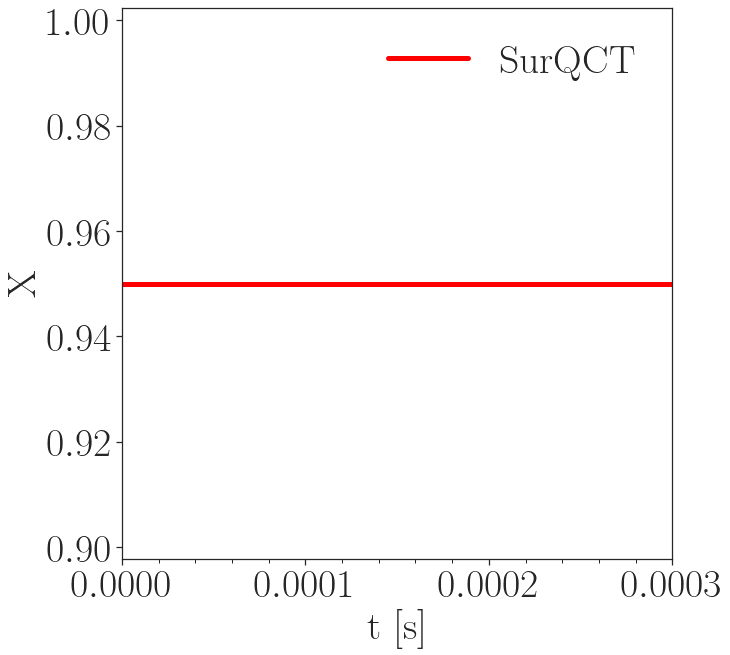

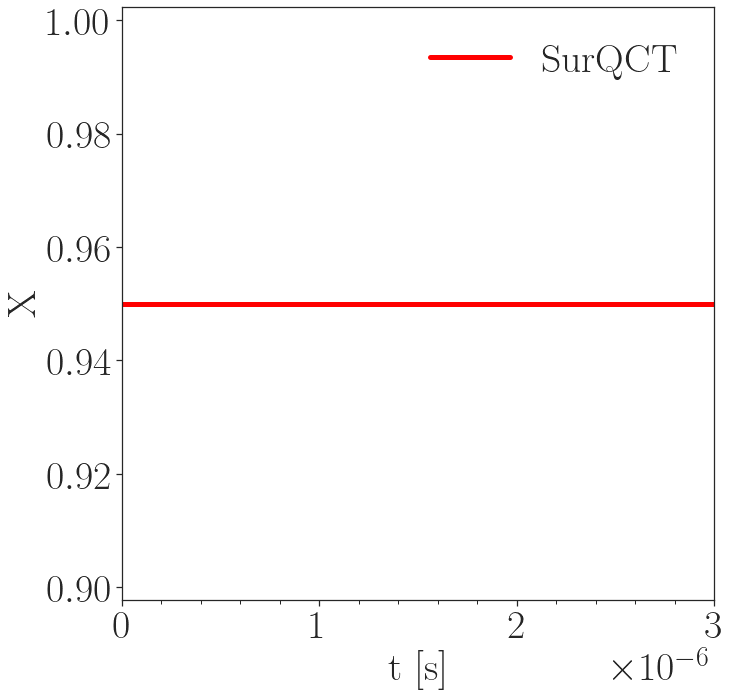

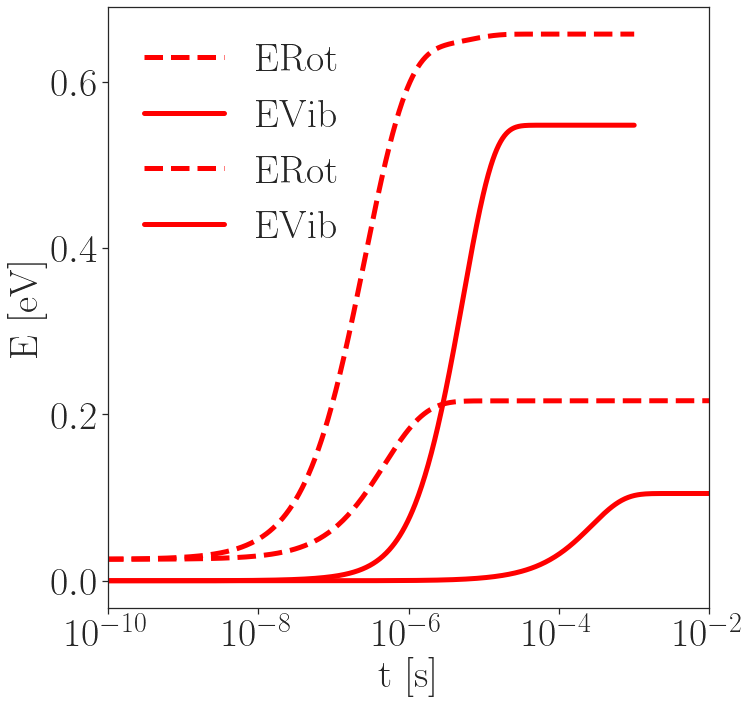

In [14]:
MoleFractionXLim=[[0,3e-4],[0,3e-6],[0,3e-6],[0,2e-6],[0,3e-7]]
for iTemp in range(len(TempVec)):                                                                                                                                                                                                                        
    Temp = TempVec[iTemp] 
    fig = Plot_MoleFraction(System,SurQCT[iTemp],TempVec,MoleFractionXLim[iTemp])
#     plt.savefig((Figure_ME_path+System.Name+'_T'+str(Temp)+'K_'+ReactionFlgSurQCT+'_X_onlySurQCT.eps'), format='eps', dpi=150)

EnergyXLim=[1e-10,1e-2]
fig = Plot_Energies(System,SurQCT,TempVec,EnergyXLim)
# plt.savefig((Figure_ME_path+System.Name+'_'+ReactionFlgSurQCT+'_Energy_onlySurQCT.eps'), format='eps', dpi=150)

In [9]:
Tempm1ov3=np.array([0.0542662644300015,0.058458220174414016,0.05109521113842053,
                0.04851017176269948,0.04640967947661462,0.043086855889876964,
                0.04051278009071822,0.03681461523578855,0.034223341669473245,
                0.032169713298890026,0.029261570872715026,0.027137861600968805])

Temp = np.power(Tempm1ov3,(-3))
print(Temp)

[ 6257.6348862   5005.68174293  7496.5148508   8759.94870121
 10004.01404853 12501.59966635 15039.16971042 20041.9143787
 24947.82912251 30037.12962372 39912.33066694 50034.91082582]
